In [1]:
#Imports
import pandas as pd
import pickle
import os
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
import lda
import pandas as pd
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
#%pip install lda

In [3]:
#Import soptify + genius dataset with song lyrics
df_lyrics = pd.read_pickle("df_rap_3k.pickle")

In [4]:
df_lyrics.head()

,track_id,album_id,artist_id,duration_ms,flg_explicit,url,track_name,track_popularity,track_type,track_danceability,...,track_release_decade,artist_name,artist_genres,artist_followers,artist_popularity,lyrics,lyrics_clean,lyrics_clean_split,lyrics_clean2,lyrics_wordlen
0,3SUiKUnZlKYliid0ZlCmUY,0uYanB3WWNU2lT9AYxCstH,3M1quhETLChtt9NHKVaajX,189405,True,https://api.spotify.com/v1/tracks/3SUiKUnZlKYl...,Detroit Flow,44,track,0.793,...,20,Quin Nfn,"[austin hip hop, southern hip hop, vapor trap]",257151,61,"Detroit Flow Lyrics\n(Ayy, DJ Showoutt, fuck g...",detroit flow lyrics ayy showoutt fuck goin hol...,"[detroit, flow, lyrics, ayy, showoutt, fuck, g...",detroit flow fuck hold really like sound beats...,351
1,2jdWfnwHSZLuBFzsA6axWt,0iNKw3iqIEy2dh7RUdKzjY,0nQlnRkAhiWnSjTmB4JkfK,273099,True,https://api.spotify.com/v1/tracks/2jdWfnwHSZLu...,Handz in da Air,8,track,0.826,...,10,Sons of Light,[],141,7,Pet Sound LyricsTurbid:\nYes it's Turbid and I...,pet sound lyricsturbid yes turbid like reclaim...,"[pet, sound, lyricsturbid, yes, turbid, like, ...",pet sound yes turbid like reclaim freely like ...,278
2,2vcLUuRT3sqXnPJaIX5w5c,0VptfDjz26NkJS4b7bjmNK,0FtsMKmZEq8fBWqdSOWtqp,236619,True,https://api.spotify.com/v1/tracks/2vcLUuRT3sqX...,Substance (We Woke Up),20,track,0.731,...,20,03 Greedo,"[cali rap, melodic rap, trap, vapor trap]",317202,71,"Substance (We Woke Up) Lyrics\nYeah, 03\nYeah,...",substance woke lyrics yeah yeah yeah yeah beat...,"[substance, woke, lyrics, yeah, yeah, yeah, ye...",substance woke yeah yeah yeah yeah beat boy ta...,348
3,1r0faljjM2b876iNoaDUh5,0XAIjjN5qxViVS0Y5fYkar,0c173mlxpT3dSFRgMO8XPh,287320,True,https://api.spotify.com/v1/tracks/1r0faljjM2b8...,Sacrifices,56,track,0.779,...,10,Big Sean,"[detroit hip hop, hip hop, pop, pop rap, rap, ...",9276030,84,"Sacrifices Lyrics\nBrrrt!\nI look up, so many ...",sacrifices lyrics brrrt look many shit many yo...,"[sacrifices, lyrics, brrrt, look, many, shit, ...",look many shit many young metro trust gon shoo...,501
4,3yhatBRYsMwuozCdQsGiTS,2t70lfxoIbKZHKFKN9ZnqE,0auu2itHTxEdAMRHvx7CyG,283200,False,https://api.spotify.com/v1/tracks/3yhatBRYsMwu...,Hard Core Rap Act,28,track,0.813,...,90,Das EFX,"[east coast hip hop, gangster rap, hardcore hi...",301411,60,Hardcore Rap Act LyricsIntro/Hook (x2)\n(*The ...,hardcore rap act lyricsintro hook hardcore rap...,"[hardcore, rap, act, lyricsintro, hook, hardco...",hardcore rap act hook hardcore rap act back ha...,352


In [5]:
#Create lemmatier, stemmer and define stopwords

word_tokenizer=RegexpTokenizer(r'\w+')

wordnet_lemmatizer = WordNetLemmatizer()

stemmer = PorterStemmer()

stopwords_nltk = set(stopwords.words('english'))



In [6]:
#Save lyrics
temp = df_lyrics["lyrics_clean"]

In [7]:
#Remove non-english words from lyrics
#Potential issue: getting rid of slang words that are common in rap
words = set(nltk.corpus.words.words())

def remove_foreign(t):
    return " ".join(w for w in nltk.wordpunct_tokenize(t) if w.lower() in words or not w.isalpha())

In [8]:
df_lyrics["lyrics_clean"] = temp.apply(remove_foreign)
df_lyrics["lyrics_clean"]

0       flow hold really like sound even flow like non...
1       pet sound yes turbid like reclaim freely like ...
2       substance woke yeah yeah yeah yeah beat boy ta...
3       look many many young trust gon shoot done made...
4       rap act hook rap act back rap act back verse d...
                              ...                        
3265    picture picture bag sold made music took merch...
3266    new music care logic icy feat mane tough love ...
3267    jay rock future blake king dead jay rock wow f...
3268    purple swag smoke better til get right getting...
3269    beginning time end time destroy extraordinary ...
Name: lyrics_clean, Length: 3270, dtype: object

In [9]:
# Define tokenizer function for CountVectorizer
def tokenize_text(raw_text):
    text = raw_text.lower()
    tokens = word_tokenizer.tokenize(text)
    return tokens

In [10]:
# Define tokenizer + lemmatizer function for CountVectorizer
def tokenize_text_lemma(raw_text):
    lowercase = raw_text.lower()  
    tokens = word_tokenizer.tokenize(lowercase)
    lemmed_text = [wordnet_lemmatizer.lemmatize(i) for i in tokens]

    return lemmed_text

In [11]:
# Define tokenizer + stemmer function for CountVectorizer

def tokenize_text_stem(raw_text):
    lowercase = raw_text.lower()
    tokens = word_tokenizer.tokenize(lowercase)
    stemmed_text = [stemmer.stem(i) for i in tokens ]

    return stemmed_text

In [12]:
#Function to vectorize lyrics
def vectorize_lyrics(df, tokenizer):
    vectorizer = CountVectorizer(tokenizer = tokenizer, stop_words = stopwords_nltk, decode_error="ignore")
    total_words = vectorizer.fit_transform(df["lyrics_clean"])
    return total_words, vectorizer

In [13]:
words_all_songs, vectorizer = vectorize_lyrics(df_lyrics, tokenize_text_lemma)

C:\Users\louis\anaconda3\envs\INSY669\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(


In [14]:
print(words_all_songs.shape)


(3270, 16276)


In [15]:
#Function to run LDA for lyrics
#Args are: dataframe with songs, vectorized lyrics, number of topics
#Returns all topic scores and topic scores for artists

def get_topics(df, lyrics, ntopics, vectorizer):
    
    model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1)
    model.fit(lyrics)
    
    #Word-Topic distributions
    topic_word = model.topic_word_
    
    #Document-Topic distributions
    doc_topic = model.doc_topic_
    doc_topic = pd.DataFrame(doc_topic)

    #Join topic distributions to song dataframe
    df = df.join(doc_topic)

    # Define dataframe to see topics by artist
    artists = pd.DataFrame()
    
    #Group topics by artist - aggregate using mean
    for i in range(int(ntopics)):
        topic="topic_"+str(i)
        artists[topic] = df.groupby(["artist_name"])[i].mean()
        
    # Word-Topic dataframe
    topics = pd.DataFrame(topic_word)
    
    topics.columns = vectorizer.get_feature_names_out()
    
    topics_transpose = topics.transpose()

    return topics_transpose, artists

In [16]:
topics_all_songs, artists_all_songs = get_topics(df_lyrics, words_all_songs, 10, vectorizer)

INFO:lda:n_documents: 3270
INFO:lda:vocab_size: 16276
INFO:lda:n_words: 773976
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -7819877
INFO:lda:<10> log likelihood: -6477628
INFO:lda:<20> log likelihood: -6235980
INFO:lda:<30> log likelihood: -6156115
INFO:lda:<40> log likelihood: -6118988
INFO:lda:<50> log likelihood: -6093117
INFO:lda:<60> log likelihood: -6076507
INFO:lda:<70> log likelihood: -6062217
INFO:lda:<80> log likelihood: -6054116
INFO:lda:<90> log likelihood: -6044651
INFO:lda:<100> log likelihood: -6039158
INFO:lda:<110> log likelihood: -6032971
INFO:lda:<120> log likelihood: -6029333
INFO:lda:<130> log likelihood: -6024945
INFO:lda:<140> log likelihood: -6021063
INFO:lda:<150> log likelihood: -6018853
INFO:lda:<160> log likelihood: -6012818
INFO:lda:<170> log likelihood: -6012364
INFO:lda:<180> log likelihood: -6008055
INFO:lda:<190> log likelihood: -6006817
INFO:lda:<200> log likelihood: -6008481
INFO:lda:<210> log likelihood: -6006587
INFO:lda:

In [17]:
#Function to sort topic coeffs by importance 
#Args are: dataframe of topics
#Returns a dict with list of sorted coeffs as values
def get_sorted_coeffs(topics):
    topics_sorted_dict = {}

    for i in range(len(topics.columns)):
        topics_sorted_dict[i] = topics.iloc[:,i].sort_values(ascending=False)
    
    return topics_sorted_dict

In [18]:
topics_sorted_all_songs = get_sorted_coeffs(topics_all_songs)

<AxesSubplot:>

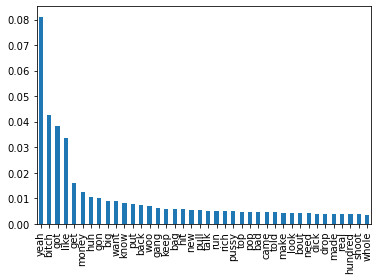

In [19]:
topics_sorted_all_songs[1].head(40).plot.bar()

In [20]:
#Excel exports if we want to

#topics_transpose.to_excel("topic_word_dist.xlsx")
#atists.to_excel("artists_topic_dist.xlsx",index=False)

In [21]:
artists_all_songs

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
artist_name,,,,,,,,,,
$NOT,0.343455,0.201791,0.013684,0.002341,0.033868,0.173531,0.160306,0.019492,0.005691,0.045841
$uicideboy$,0.049760,0.198559,0.105038,0.062860,0.239496,0.004912,0.022661,0.047304,0.061789,0.207621
03 Greedo,0.252290,0.210305,0.511832,0.000382,0.000382,0.000382,0.023282,0.000382,0.000382,0.000382
070 Shake,0.495991,0.054270,0.320749,0.044072,0.072247,0.000749,0.002749,0.002749,0.000749,0.005673
1takejay,0.000610,0.549390,0.012805,0.146951,0.006707,0.000610,0.006707,0.000610,0.000610,0.275000
...,...,...,...,...,...,...,...,...,...,...
mansionz,0.394226,0.045417,0.234107,0.000774,0.062679,0.000774,0.000774,0.018631,0.000774,0.241845
mike.,0.459367,0.223732,0.040114,0.040540,0.009356,0.001416,0.023830,0.005121,0.001201,0.195322
slowthai,0.119801,0.008647,0.097411,0.046029,0.072811,0.113488,0.308938,0.000517,0.077139,0.155218


# Topics by 5-year segments

In [22]:
#Function to get a dict containing epoch end and start year
#Args: dataframe with songs, number of years in epoch
#Returns: dict with lists [start year, end_year] as values

#TO IMPROVE: make it so last epoch is as short as it can be instead of full 5
def get_epochs(df, num_years):
    min_year = df.track_release_year.min()
    max_year = df.track_release_year.max()

    i = 0
    dict_epoch = {}
    counter = max_year
    temp_min = min_year

    while counter >= min_year:
        temp_list = []

        dict_epoch[i] = temp_list

        i += 1


        temp_list.insert(1, counter)
        counter -= num_years
        temp_list.insert(0, counter + 1)

        continue

    num_epochs = i
    
    print(f"Oldest release was in {min_year}. Newest release was in {max_year}")
    
    print(f"There are {num_epochs} epochs of 5 years.")
    
    return dict_epoch

In [23]:
dict_epoch_all_songs = get_epochs(df_lyrics, 5)

Oldest release was in 1951. Newest release was in 2022
There are 15 epochs of 5 years.


In [24]:
dict_epoch_all_songs

{0: [2018, 2022],
 1: [2013, 2017],
 2: [2008, 2012],
 3: [2003, 2007],
 4: [1998, 2002],
 5: [1993, 1997],
 6: [1988, 1992],
 7: [1983, 1987],
 8: [1978, 1982],
 9: [1973, 1977],
 10: [1968, 1972],
 11: [1963, 1967],
 12: [1958, 1962],
 13: [1953, 1957],
 14: [1948, 1952]}

In [26]:
# Get topics by epoch

topic_dict_list = []
artists_df_list = []
for i in range(len(dict_epoch_all_songs)):
    
    #Only get songs for that epoch
    df_temp = df_lyrics[(df_lyrics.track_release_year >= dict_epoch_all_songs[i][0])
                        & (df_lyrics.track_release_year <= dict_epoch_all_songs[i][1])]
    
    #Check to see how many songs are in df
    print(f"There are {len(df_temp)} songs in epoch {i}: {dict_epoch_all_songs[i][0]} to {dict_epoch_all_songs[i][1]}")
    
    #Break loop if df is empty
    if df_temp.empty:
        print('Break: no songs')
        break
        
    #Vectorize lyrics
    vec_lyrics, vectorizer = vectorize_lyrics(df_temp, tokenize_text_lemma)
    
    #Get topics and artists df
    temp_topics, temp_artists = get_topics(df_temp, vec_lyrics, 10, vectorizer)
    
    #Sort topic coeffs
    temp_topics_sorted = get_sorted_coeffs(temp_topics)
    
    topic_dict_list.append(temp_topics_sorted)
    artists_df_list.append(temp_artists)

There are 1477 songs in epoch 0: 2018 to 2022


INFO:lda:n_documents: 1477
INFO:lda:vocab_size: 10285
INFO:lda:n_words: 318678
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -3188076
INFO:lda:<10> log likelihood: -2528840
INFO:lda:<20> log likelihood: -2450245
INFO:lda:<30> log likelihood: -2424803
INFO:lda:<40> log likelihood: -2410864
INFO:lda:<50> log likelihood: -2401174
INFO:lda:<60> log likelihood: -2394120
INFO:lda:<70> log likelihood: -2388576
INFO:lda:<80> log likelihood: -2383310
INFO:lda:<90> log likelihood: -2378680
INFO:lda:<100> log likelihood: -2375860
INFO:lda:<110> log likelihood: -2375394
INFO:lda:<120> log likelihood: -2372402
INFO:lda:<130> log likelihood: -2369406
INFO:lda:<140> log likelihood: -2367303
INFO:lda:<150> log likelihood: -2365311
INFO:lda:<160> log likelihood: -2364513
INFO:lda:<170> log likelihood: -2362715
INFO:lda:<180> log likelihood: -2361022
INFO:lda:<190> log likelihood: -2360176
INFO:lda:<200> log likelihood: -2359991
INFO:lda:<210> log likelihood: -2358079
INFO:lda:

There are 735 songs in epoch 1: 2013 to 2017


INFO:lda:n_documents: 735
INFO:lda:vocab_size: 9615
INFO:lda:n_words: 175148
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1802078
INFO:lda:<10> log likelihood: -1422233
INFO:lda:<20> log likelihood: -1377716
INFO:lda:<30> log likelihood: -1360476
INFO:lda:<40> log likelihood: -1350809
INFO:lda:<50> log likelihood: -1345119
INFO:lda:<60> log likelihood: -1341958
INFO:lda:<70> log likelihood: -1339837
INFO:lda:<80> log likelihood: -1337495
INFO:lda:<90> log likelihood: -1335850
INFO:lda:<100> log likelihood: -1335327
INFO:lda:<110> log likelihood: -1334147
INFO:lda:<120> log likelihood: -1332394
INFO:lda:<130> log likelihood: -1331817
INFO:lda:<140> log likelihood: -1331184
INFO:lda:<150> log likelihood: -1331226
INFO:lda:<160> log likelihood: -1330883
INFO:lda:<170> log likelihood: -1330279
INFO:lda:<180> log likelihood: -1329979
INFO:lda:<190> log likelihood: -1329448
INFO:lda:<200> log likelihood: -1328372
INFO:lda:<210> log likelihood: -1328350
INFO:lda:<2

There are 171 songs in epoch 2: 2008 to 2012


INFO:lda:vocab_size: 4720
INFO:lda:n_words: 40854
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -428780
INFO:lda:<10> log likelihood: -323506
INFO:lda:<20> log likelihood: -316959
INFO:lda:<30> log likelihood: -313995
INFO:lda:<40> log likelihood: -311994
INFO:lda:<50> log likelihood: -310372
INFO:lda:<60> log likelihood: -309529
INFO:lda:<70> log likelihood: -309318
INFO:lda:<80> log likelihood: -308932
INFO:lda:<90> log likelihood: -308554
INFO:lda:<100> log likelihood: -308118
INFO:lda:<110> log likelihood: -307825
INFO:lda:<120> log likelihood: -307542
INFO:lda:<130> log likelihood: -307793
INFO:lda:<140> log likelihood: -307273
INFO:lda:<150> log likelihood: -307272
INFO:lda:<160> log likelihood: -306956
INFO:lda:<170> log likelihood: -306890
INFO:lda:<180> log likelihood: -306454
INFO:lda:<190> log likelihood: -306164
INFO:lda:<200> log likelihood: -306121
INFO:lda:<210> log likelihood: -305733
INFO:lda:<220> log likelihood: -305900
INFO:lda:<230> log li

There are 150 songs in epoch 3: 2003 to 2007


INFO:lda:n_documents: 150
INFO:lda:vocab_size: 5481
INFO:lda:n_words: 41265
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -444383
INFO:lda:<10> log likelihood: -343118
INFO:lda:<20> log likelihood: -334763
INFO:lda:<30> log likelihood: -331906
INFO:lda:<40> log likelihood: -330551
INFO:lda:<50> log likelihood: -329298
INFO:lda:<60> log likelihood: -328539
INFO:lda:<70> log likelihood: -328193
INFO:lda:<80> log likelihood: -327532
INFO:lda:<90> log likelihood: -327454
INFO:lda:<100> log likelihood: -326865
INFO:lda:<110> log likelihood: -325758
INFO:lda:<120> log likelihood: -325867
INFO:lda:<130> log likelihood: -325618
INFO:lda:<140> log likelihood: -325238
INFO:lda:<150> log likelihood: -325015
INFO:lda:<160> log likelihood: -324695
INFO:lda:<170> log likelihood: -324362
INFO:lda:<180> log likelihood: -324514
INFO:lda:<190> log likelihood: -324322
INFO:lda:<200> log likelihood: -324460
INFO:lda:<210> log likelihood: -324563
INFO:lda:<220> log likelihood: -32

There are 228 songs in epoch 4: 1998 to 2002


INFO:lda:n_documents: 228
INFO:lda:vocab_size: 7041
INFO:lda:n_words: 60058
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -653342
INFO:lda:<10> log likelihood: -511132
INFO:lda:<20> log likelihood: -497887
INFO:lda:<30> log likelihood: -493839
INFO:lda:<40> log likelihood: -489808
INFO:lda:<50> log likelihood: -488432
INFO:lda:<60> log likelihood: -487499
INFO:lda:<70> log likelihood: -485799
INFO:lda:<80> log likelihood: -485330
INFO:lda:<90> log likelihood: -484608
INFO:lda:<100> log likelihood: -483583
INFO:lda:<110> log likelihood: -483146
INFO:lda:<120> log likelihood: -482345
INFO:lda:<130> log likelihood: -481901
INFO:lda:<140> log likelihood: -481145
INFO:lda:<150> log likelihood: -480713
INFO:lda:<160> log likelihood: -480028
INFO:lda:<170> log likelihood: -479944
INFO:lda:<180> log likelihood: -480074
INFO:lda:<190> log likelihood: -479189
INFO:lda:<200> log likelihood: -479633
INFO:lda:<210> log likelihood: -479114
INFO:lda:<220> log likelihood: -47

There are 394 songs in epoch 5: 1993 to 1997


INFO:lda:n_documents: 394
INFO:lda:vocab_size: 8904
INFO:lda:n_words: 110946
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1185722
INFO:lda:<10> log likelihood: -948098
INFO:lda:<20> log likelihood: -921506
INFO:lda:<30> log likelihood: -911765
INFO:lda:<40> log likelihood: -906329
INFO:lda:<50> log likelihood: -902143
INFO:lda:<60> log likelihood: -900037
INFO:lda:<70> log likelihood: -897808
INFO:lda:<80> log likelihood: -896516
INFO:lda:<90> log likelihood: -895469
INFO:lda:<100> log likelihood: -894886
INFO:lda:<110> log likelihood: -894377
INFO:lda:<120> log likelihood: -893096
INFO:lda:<130> log likelihood: -892174
INFO:lda:<140> log likelihood: -891222
INFO:lda:<150> log likelihood: -891850
INFO:lda:<160> log likelihood: -891543
INFO:lda:<170> log likelihood: -890872
INFO:lda:<180> log likelihood: -890429
INFO:lda:<190> log likelihood: -889912
INFO:lda:<200> log likelihood: -888967
INFO:lda:<210> log likelihood: -888626
INFO:lda:<220> log likelihood: -

There are 109 songs in epoch 6: 1988 to 1992


INFO:lda:<0> log likelihood: -286428
INFO:lda:<10> log likelihood: -218961
INFO:lda:<20> log likelihood: -214648
INFO:lda:<30> log likelihood: -213376
INFO:lda:<40> log likelihood: -212460
INFO:lda:<50> log likelihood: -211921
INFO:lda:<60> log likelihood: -211512
INFO:lda:<70> log likelihood: -211292
INFO:lda:<80> log likelihood: -210840
INFO:lda:<90> log likelihood: -210391
INFO:lda:<100> log likelihood: -209990
INFO:lda:<110> log likelihood: -210063
INFO:lda:<120> log likelihood: -209807
INFO:lda:<130> log likelihood: -209385
INFO:lda:<140> log likelihood: -209455
INFO:lda:<150> log likelihood: -209581
INFO:lda:<160> log likelihood: -209285
INFO:lda:<170> log likelihood: -209360
INFO:lda:<180> log likelihood: -209139
INFO:lda:<190> log likelihood: -208673
INFO:lda:<200> log likelihood: -208595
INFO:lda:<210> log likelihood: -208351
INFO:lda:<220> log likelihood: -208289
INFO:lda:<230> log likelihood: -208350
INFO:lda:<240> log likelihood: -208197
INFO:lda:<250> log likelihood: -2081

There are 5 songs in epoch 7: 1983 to 1987


INFO:lda:<70> log likelihood: -4609
INFO:lda:<80> log likelihood: -4576
INFO:lda:<90> log likelihood: -4523
INFO:lda:<100> log likelihood: -4610
INFO:lda:<110> log likelihood: -4558
INFO:lda:<120> log likelihood: -4564
INFO:lda:<130> log likelihood: -4589
INFO:lda:<140> log likelihood: -4558
INFO:lda:<150> log likelihood: -4554
INFO:lda:<160> log likelihood: -4598
INFO:lda:<170> log likelihood: -4537
INFO:lda:<180> log likelihood: -4554
INFO:lda:<190> log likelihood: -4596
INFO:lda:<200> log likelihood: -4559
INFO:lda:<210> log likelihood: -4538
INFO:lda:<220> log likelihood: -4574
INFO:lda:<230> log likelihood: -4565
INFO:lda:<240> log likelihood: -4583
INFO:lda:<250> log likelihood: -4558
INFO:lda:<260> log likelihood: -4587
INFO:lda:<270> log likelihood: -4603
INFO:lda:<280> log likelihood: -4560
INFO:lda:<290> log likelihood: -4587
INFO:lda:<300> log likelihood: -4565
INFO:lda:<310> log likelihood: -4575
INFO:lda:<320> log likelihood: -4576
INFO:lda:<330> log likelihood: -4576
INFO

There are 0 songs in epoch 8: 1978 to 1982
Break: no songs


In [28]:
topic_dict_list[0][0]

back     2.471052e-02
never    1.910063e-02
one      1.658953e-02
time     1.343730e-02
get      1.330373e-02
             ...     
gator    2.671379e-07
gauge    2.671379e-07
gauze    2.671379e-07
gawk     2.671379e-07
limit    2.671379e-07
Name: 0, Length: 10285, dtype: float64

In [29]:
topic_dict_list[1][0]

black       0.039561
wit         0.023665
rock        0.021514
kodak       0.020558
remix       0.018287
              ...   
fragile     0.000001
fracture    0.000001
fraction    0.000001
foy         0.000001
zoom        0.000001
Name: 0, Length: 9615, dtype: float64

In [30]:
artists_df_list[0]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
artist_name,,,,,,,,,,
$NOT,0.108247,0.022064,0.134437,0.295244,0.027629,0.054058,0.046056,0.150735,0.044918,0.116612
$uicideboy$,0.176026,0.080258,0.416971,0.066368,0.004116,0.005306,0.020959,0.109773,0.119652,0.000570
03 Greedo,0.000382,0.511832,0.374427,0.076718,0.000382,0.023282,0.000382,0.000382,0.000382,0.011832
070 Shake,0.107846,0.233222,0.234238,0.000458,0.063581,0.075393,0.117564,0.003283,0.163958,0.000458
1takejay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
lilbootycall,0.235882,0.341765,0.088824,0.000588,0.000588,0.006471,0.135882,0.035882,0.153529,0.000588
mike.,0.117076,0.295201,0.195927,0.001970,0.000703,0.008307,0.021924,0.050823,0.005374,0.302695
slowthai,0.099773,0.266062,0.066138,0.349584,0.009448,0.014361,0.047997,0.005291,0.013983,0.127362


In [31]:
artists_df_list[1]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
artist_name,,,,,,,,,,
$uicideboy$,0.009413,0.078235,0.154454,0.029807,0.244748,0.241130,0.024419,0.056900,0.158206,0.002687
2 Chainz,0.018588,0.039865,0.180498,0.083588,0.201051,0.103128,0.027315,0.106852,0.200871,0.038246
21 Savage,0.018485,0.045758,0.103333,0.030606,0.366970,0.006364,0.051818,0.015455,0.360909,0.000303
3rd Bass,0.030916,0.271374,0.000382,0.175954,0.091985,0.000382,0.240840,0.187405,0.000382,0.000382
40 Glocc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Young Thug,0.251836,0.120579,0.109816,0.030005,0.280857,0.019296,0.020756,0.085682,0.003568,0.077606
Young Thugga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yung Lean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
artists_df_list[2]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
artist_name,,,,,,,,,,
2 Chainz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50 Cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A$AP Rocky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ab-Soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aloe Blacc,0.00049,0.083824,0.025000,0.005392,0.338725,0.284804,0.176961,0.000490,0.000490,0.083824
...,...,...,...,...,...,...,...,...,...,...
Uncle Murda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waka Flocka Flame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wiz Khalifa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_lyrics.artist_name[(df_lyrics.track_release_year >=2012) & (df_lyrics.track_release_year <= 2016)].value_counts().head(50)